In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

pd.set_option('display.max_rows', 1000)

In [2]:
SHOW_FIGURES = True

In [3]:
if not SHOW_FIGURES:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
        'text.latex.preamble' : r'\newcommand{\mathdefault}[1][]{}'
    })


In [4]:
po_path = './PO/results/hungarian/results.csv'
bpic_path = './BPIC/results/results_Hungarian/results.csv'

In [5]:
csv_dict = []
def load_file(file_path, csv_dict):
    with open(file_path, 'r') as file:
        # Iterate over each line in the fileplt.plot(x_fit, y_fit, color='green', label='Polynomial Approximation')
        for line in file:
            # Split the line content by comma
            line_data = line.strip().split(',')
    
            if len(line_data) == 7:
                seven_keys = ['delta', 'state', 'time', 'occupation', 'fairness', 'allocated', 'skipped']
                csv_dict.append(dict(zip(seven_keys, line_data)))
    
            elif len(line_data) == 15:
                fifteen_keys = ['method', 'execution time', 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                csv_dict.append(dict(zip(fifteen_keys, line_data)))
            elif len(line_data) == 19:
                nineteen_keys = ['method', 'start time', 'end time', 'real execution time', 'system execution time',
                                 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness', 'weighted resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                row_dict = dict(zip(nineteen_keys, line_data))
                for k in ['optimal solution', 'feasible solution', 'no solution']:
                    if row_dict[k] == '':
                        row_dict[k] = 0
                csv_dict.append(row_dict)
            else:
                print(len(line_data))

df_dtypes = {'method' : str, 'start time' : str, 'end time' : str, 'real execution time' : float, 'system execution time' : float,
             'delta' : float, 'makespan' : float, 'result message' : str,
             'makespan' : float, 'resource occupation' : float, 'resource fairness' : float, 'weighted resource fairness' : float,
             'assigned tasks' : int, 'allocated tasks' : int, 'postponed tasks' : int,
             'optimal solution' : int, 'feasible solution' : int, 'no solution' : int,
             'resource worklist rule' : str}

bpic_dict = []
load_file(bpic_path, bpic_dict)
bpic_df = pd.DataFrame(bpic_dict)
bpic_df['data_set'] = 'BPIC'

po_dict = []
load_file(po_path, po_dict)
po_df = pd.DataFrame(po_dict)
po_df['data_set'] = 'PO'

for k, v in df_dtypes.items():
    bpic_df[k] = bpic_df[k].astype(v)
    po_df[k] = po_df[k].astype(v)

df = pd.concat([bpic_df, po_df], axis=0)

In [6]:
df = df[df['method'] == 'Hungarian']
df.reset_index(inplace=True)
df

,index,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,...,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule,data_set
0,0,Hungarian,2024-03-07 12:43:34,2024-03-07 15:14:28,9054.111983,39187.478689,1.02,13.096657521503904,COMPLETED: you completed 1680 hours of simulat...,13.194856,...,0.042107,1.541104,72934,235415,5144773,0,0,0,,BPIC
1,1,Hungarian,2024-03-07 12:43:34,2024-03-07 15:22:25,9530.481480,40721.516064,0.98,13.582462504685047,COMPLETED: you completed 1680 hours of simulat...,13.708642,...,0.052517,1.772650,75753,255939,5440059,0,0,0,,BPIC
2,2,Hungarian,2024-03-07 12:43:34,2024-03-07 15:30:17,10002.941284,40334.036118,0.92,15.314963597139323,COMPLETED: you completed 1680 hours of simulat...,15.518983,...,0.047531,1.674501,75107,239735,6546681,0,0,0,,BPIC
3,3,Hungarian,2024-03-07 12:43:34,2024-03-07 15:31:03,10048.805430,40824.421342,0.96,15.240744219516966,COMPLETED: you completed 1680 hours of simulat...,15.307990,...,0.106961,2.304843,76135,241321,6471156,0,0,0,,BPIC
4,4,Hungarian,2024-03-07 12:43:34,2024-03-07 15:34:42,10267.367667,42753.050347,1.04,13.192049057786155,COMPLETED: you completed 1680 hours of simulat...,13.246918,...,0.049359,1.668821,78852,286950,6347797,0,0,0,,BPIC
5,5,Hungarian,2024-03-07 12:43:34,2024-03-07 15:42:28,10733.838698,41213.838651,0.94,16.567280294708066,COMPLETED: you completed 1680 hours of simulat...,16.754699,...,0.051714,1.980207,76889,257061,7260616,0,0,0,,BPIC
6,6,Hungarian,2024-03-07 12:43:34,2024-03-07 16:09:02,12327.691667,43967.233262,0.90,18.545211732405615,COMPLETED: you completed 1680 hours of simulat...,18.762108,...,0.053606,2.021580,81560,249642,9419874,0,0,0,,BPIC
7,7,Hungarian,2024-03-07 12:43:34,2024-03-07 16:10:49,12434.964398,44813.867820,1.00,17.61804783011175,COMPLETED: you completed 1680 hours of simulat...,17.806327,...,0.035688,1.361771,82982,301014,9282543,0,0,0,,BPIC
8,8,Hungarian,2024-03-07 15:30:17,2024-03-07 18:11:07,9649.493365,41000.449277,1.10,13.322233743409068,COMPLETED: you completed 1680 hours of simulat...,13.393464,...,0.041545,1.398512,75933,290856,5706572,0,0,0,,BPIC
9,9,Hungarian,2024-03-07 15:22:25,2024-03-07 18:15:33,10387.775621,40832.864625,1.08,15.314060686494189,COMPLETED: you completed 1680 hours of simulat...,15.455450,...,0.048167,1.489637,75825,286599,6879363,0,0,0,,BPIC


In [7]:
df['delta'] = df['delta'].round(2)
df

,index,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,...,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule,data_set
0,0,Hungarian,2024-03-07 12:43:34,2024-03-07 15:14:28,9054.111983,39187.478689,1.02,13.096657521503904,COMPLETED: you completed 1680 hours of simulat...,13.194856,...,0.042107,1.541104,72934,235415,5144773,0,0,0,,BPIC
1,1,Hungarian,2024-03-07 12:43:34,2024-03-07 15:22:25,9530.481480,40721.516064,0.98,13.582462504685047,COMPLETED: you completed 1680 hours of simulat...,13.708642,...,0.052517,1.772650,75753,255939,5440059,0,0,0,,BPIC
2,2,Hungarian,2024-03-07 12:43:34,2024-03-07 15:30:17,10002.941284,40334.036118,0.92,15.314963597139323,COMPLETED: you completed 1680 hours of simulat...,15.518983,...,0.047531,1.674501,75107,239735,6546681,0,0,0,,BPIC
3,3,Hungarian,2024-03-07 12:43:34,2024-03-07 15:31:03,10048.805430,40824.421342,0.96,15.240744219516966,COMPLETED: you completed 1680 hours of simulat...,15.307990,...,0.106961,2.304843,76135,241321,6471156,0,0,0,,BPIC
4,4,Hungarian,2024-03-07 12:43:34,2024-03-07 15:34:42,10267.367667,42753.050347,1.04,13.192049057786155,COMPLETED: you completed 1680 hours of simulat...,13.246918,...,0.049359,1.668821,78852,286950,6347797,0,0,0,,BPIC
5,5,Hungarian,2024-03-07 12:43:34,2024-03-07 15:42:28,10733.838698,41213.838651,0.94,16.567280294708066,COMPLETED: you completed 1680 hours of simulat...,16.754699,...,0.051714,1.980207,76889,257061,7260616,0,0,0,,BPIC
6,6,Hungarian,2024-03-07 12:43:34,2024-03-07 16:09:02,12327.691667,43967.233262,0.90,18.545211732405615,COMPLETED: you completed 1680 hours of simulat...,18.762108,...,0.053606,2.021580,81560,249642,9419874,0,0,0,,BPIC
7,7,Hungarian,2024-03-07 12:43:34,2024-03-07 16:10:49,12434.964398,44813.867820,1.00,17.61804783011175,COMPLETED: you completed 1680 hours of simulat...,17.806327,...,0.035688,1.361771,82982,301014,9282543,0,0,0,,BPIC
8,8,Hungarian,2024-03-07 15:30:17,2024-03-07 18:11:07,9649.493365,41000.449277,1.10,13.322233743409068,COMPLETED: you completed 1680 hours of simulat...,13.393464,...,0.041545,1.398512,75933,290856,5706572,0,0,0,,BPIC
9,9,Hungarian,2024-03-07 15:22:25,2024-03-07 18:15:33,10387.775621,40832.864625,1.08,15.314060686494189,COMPLETED: you completed 1680 hours of simulat...,15.455450,...,0.048167,1.489637,75825,286599,6879363,0,0,0,,BPIC


In [15]:
# When two equal delta values are present sample a random one
result = df.groupby(['data_set', 'delta']).apply(lambda x: x.sample(1)).reset_index(drop=True)
#result
df = result
df.sort_values(['data_set', 'delta'], inplace=True)

/tmp/ipykernel_56271/963499017.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['data_set', 'delta']).apply(lambda x: x.sample(1)).reset_index(drop=True)


In [16]:
df

,index,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,...,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule,data_set
0,6,Hungarian,2024-03-07 12:43:34,2024-03-07 16:09:02,12327.691667,43967.233262,0.90,18.545211732405615,COMPLETED: you completed 1680 hours of simulat...,18.762108,...,0.053606,2.021580,81560,249642,9419874,0,0,0,,BPIC
1,2,Hungarian,2024-03-07 12:43:34,2024-03-07 15:30:17,10002.941284,40334.036118,0.92,15.314963597139323,COMPLETED: you completed 1680 hours of simulat...,15.518983,...,0.047531,1.674501,75107,239735,6546681,0,0,0,,BPIC
2,5,Hungarian,2024-03-07 12:43:34,2024-03-07 15:42:28,10733.838698,41213.838651,0.94,16.567280294708066,COMPLETED: you completed 1680 hours of simulat...,16.754699,...,0.051714,1.980207,76889,257061,7260616,0,0,0,,BPIC
3,3,Hungarian,2024-03-07 12:43:34,2024-03-07 15:31:03,10048.805430,40824.421342,0.96,15.240744219516966,COMPLETED: you completed 1680 hours of simulat...,15.307990,...,0.106961,2.304843,76135,241321,6471156,0,0,0,,BPIC
4,1,Hungarian,2024-03-07 12:43:34,2024-03-07 15:22:25,9530.481480,40721.516064,0.98,13.582462504685047,COMPLETED: you completed 1680 hours of simulat...,13.708642,...,0.052517,1.772650,75753,255939,5440059,0,0,0,,BPIC
5,7,Hungarian,2024-03-07 12:43:34,2024-03-07 16:10:49,12434.964398,44813.867820,1.00,17.61804783011175,COMPLETED: you completed 1680 hours of simulat...,17.806327,...,0.035688,1.361771,82982,301014,9282543,0,0,0,,BPIC
6,0,Hungarian,2024-03-07 12:43:34,2024-03-07 15:14:28,9054.111983,39187.478689,1.02,13.096657521503904,COMPLETED: you completed 1680 hours of simulat...,13.194856,...,0.042107,1.541104,72934,235415,5144773,0,0,0,,BPIC
7,4,Hungarian,2024-03-07 12:43:34,2024-03-07 15:34:42,10267.367667,42753.050347,1.04,13.192049057786155,COMPLETED: you completed 1680 hours of simulat...,13.246918,...,0.049359,1.668821,78852,286950,6347797,0,0,0,,BPIC
8,11,Hungarian,2024-03-07 15:14:29,2024-03-07 18:24:54,11424.747357,44084.138698,1.06,16.297655314270497,COMPLETED: you completed 1680 hours of simulat...,16.386935,...,0.043923,1.658450,81714,318040,7839898,0,0,0,,BPIC
9,9,Hungarian,2024-03-07 15:22:25,2024-03-07 18:15:33,10387.775621,40832.864625,1.08,15.314060686494189,COMPLETED: you completed 1680 hours of simulat...,15.455450,...,0.048167,1.489637,75825,286599,6879363,0,0,0,,BPIC


In [10]:
from scipy.optimize import curve_fit

def polynomial_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

degree = 2  # Adjust the degree of the polynomial
params, _ = curve_fit(polynomial_func, df['delta'], df['makespan'], p0=[1] * (degree + 1))

x_fit = np.linspace(df['delta'].min(), df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params)



In [11]:
df = df[df['result message'] != 'Stopped']
df = df.sort_values(by='delta')

<Figure size 640x480 with 0 Axes>

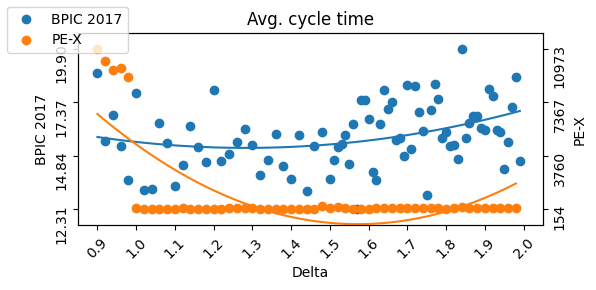

<Figure size 640x480 with 0 Axes>

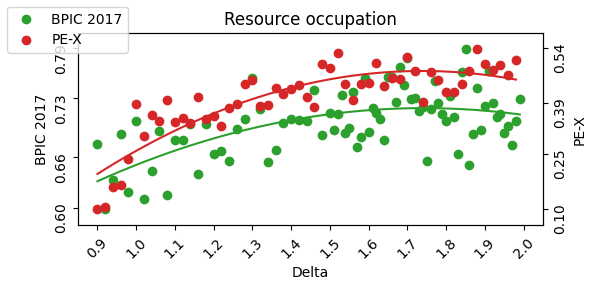

<Figure size 640x480 with 0 Axes>

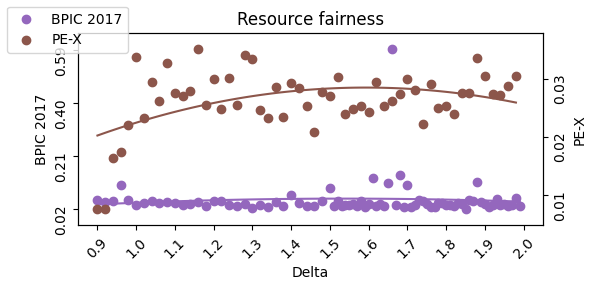

<Figure size 640x480 with 0 Axes>

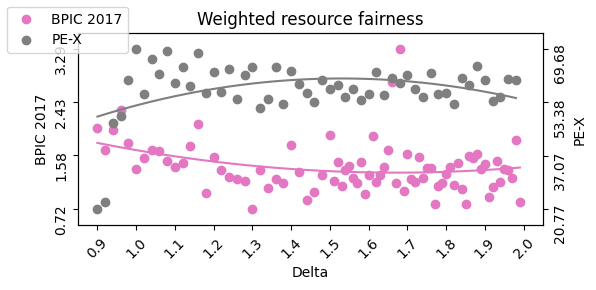

KeyError: 'Delta'

In [12]:
def plot(df_1, df_2, df_names,labels=None, colors=plt.rcParams["axes.prop_cycle"](), degree=2, yrange=None):
    x1 = df_1[df_names[0]]
    y1 = df_1[df_names[1]]
    y1_range = max(y1) - min(y1)
    x2 = df_2[df_names[0]]
    y2 = df_2[df_names[1]]
    y2_range = max(y2) - min(y2)
    
    plt.clf()
    #fig = plt.gcf()
    fig, ax1 = plt.subplots()
    fig.set_size_inches(6, 2.5)
    plt.xlim(0.85, 2.05)
    plt.xticks(rotation=45)
    plt.yticks(rotation=90)
    plt.xticks(np.linspace(0.9, 2.0, 12))
    #plt.tight_layout(pad=5)
    plt.margins(x=0.3, y=0.1)
    
    # Set labels and title
    if labels:
        plt.xlabel(labels[0])
        #plt.ylabel(labels[1])
        plt.title(labels[1])
    else:
        plt.xlabel('x')
        plt.ylabel('y')

    """
    if yrange:
        plt.ylim(yrange[0], yrange[1])
        plt.yticks(np.linspace(yrange[0], yrange[1], 11))
    else:
        y_range = max(y1.max(), y2.max()) - min(y1.min(), y2.min())
        plt.ylim(min(y1.min(), y2.min()) - 0.1*y_range,  max(y1.max(), y2.max()) + 0.1*y_range)
        plt.yticks(np.linspace(min(y1.min(), y2.min()),  max(y1.max(), y2.max()), 10))
    """

    # Plot the data
    p = plt.scatter(x1, y1, marker='o', color=next(colors)['color'], label='BPIC 2017')
    params, _ = curve_fit(polynomial_func, x1, y1, p0=[1] * (degree + 1))
    
    x_fit = np.linspace(x1.min(), x1.max(), 100)
    y_fit = polynomial_func(x_fit, *params)

    ax1.set_yticks(np.round(np.linspace(min(y1), max(y1), 4), 2))
    ax1.set_ylim(min(y1)-y1_range*0.1, max(y1) + y1_range*0.1)
    ax1.plot(x_fit, y_fit, color=p.get_facecolor())
    ax1.set_ylabel('BPIC 2017')
    ax2 = ax1.twinx()

    p = plt.scatter(x2, y2, marker='o', color=next(colors)['color'], label='PE-X')
    params, _ = curve_fit(polynomial_func, x2, y2, p0=[1] * (degree + 1))
    
    x_fit = np.linspace(x2.min(), x2.max(), 100)
    y_fit = polynomial_func(x_fit, *params)
    ax2.plot(x_fit, y_fit, color=p.get_facecolor())
    ax2.tick_params(axis="y",labelrotation=90)
    ax2.set_yticks(np.round(np.linspace(min(y2), max(y2), 4), 2))
    ax2.set_ylim(min(y2)-y2_range*0.1, max(y2) + y2_range*0.1)
    ax2.set_ylabel('PE-X')
    fig.legend(loc="upper left")
    
    # Show the plot
    if  not SHOW_FIGURES:
        plt.savefig('task_assignment_' + labels[0] + '_' + labels[1] + '.pgf')
    plt.show()


colors = plt.rcParams["axes.prop_cycle"]()

plot(bpic_df, po_df, ('delta', 'makespan'), ('Delta', 'Avg. cycle time'), colors=colors)
plot(bpic_df, po_df, ('delta', 'resource occupation'), ('Delta', 'Resource occupation'), colors=colors)
plot(bpic_df, po_df, ('delta', 'resource fairness'), ('Delta', 'Resource fairness'), colors=colors)
plot(bpic_df, po_df, ('delta', 'weighted resource fairness'), ('Delta', 'Weighted resource fairness'), colors=colors)


plot(df['delta'], df['resource occupation'], ('Delta', 'Resource occupation'), colors=colors, yrange=(0.5,1))
plot(df['delta'], df['resource fairness'], ('Delta', 'Resource fairness'), colors=colors, yrange=(0.0,0.1))
plot(df['delta'], df['weighted resource fairness'], ('Delta', 'Weighted resource fairness'), colors=colors, yrange=(0.5,3.5))
plot(df['delta'], df['postponed tasks'], ('Delta', 'Postponed tasks'), colors=colors)
plot(df['delta'], df['allocated tasks'], ('Delta', 'Allocated tasks'), colors=colors)
plot(df['delta'], df['allocated tasks'], ('Delta', 'Assigned tasks'), colors=colors)